### Notas y Analisis para incorporar 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_url = "../Data/properatti.csv"
data = pd.read_csv(data_url, encoding="utf-8")
print("cantidad de filas: " + str(data.shape[0]))
print("cantidad de columnas: " + str(data.shape[1]))

cantidad de filas: 121220
cantidad de columnas: 26


Vemos cuantos nulos tene

In [20]:
data.isnull().sum()

Unnamed: 0                         0
operation                          0
property_type                      0
place_name                        23
place_with_parent_names            0
country_name                       0
state_name                         0
geonames_id                    18717
lat-lon                        51550
lat                            51550
lon                            51550
price                          20410
currency                       20411
price_aprox_local_currency     20410
price_aprox_usd                20410
surface_total_in_m2            39328
surface_covered_in_m2          19907
price_usd_per_m2               52603
price_per_m2                   33562
floor                         113321
rooms                          73830
expenses                      106958
properati_url                      0
description                        2
title                              0
image_thumbnail                 3112
dtype: int64

#### Vemos el % de nulos que hay 

In [15]:
data.isnull().sum() / data.shape[0]

Unnamed: 0                 0.000000
operation                  0.000000
property_type              0.000000
place_name                 0.000228
place_with_parent_names    0.000000
country_name               0.000000
state_name                 0.000000
geonames_id                0.168158
lat-lon                    0.419224
lat                        0.419224
lon                        0.419224
price_aprox_usd            0.000000
surface_total_in_m2        0.316873
surface_covered_in_m2      0.130443
price_usd_per_m2           0.319343
price_per_m2               0.130463
floor                      0.931396
rooms                      0.607390
expenses                   0.868604
properati_url              0.000000
description                0.000020
title                      0.000000
image_thumbnail            0.022319
dtype: float64

##### La variable target para el modelo es "price_aprox_usd", se eliminan los 20410 nulos: 

In [21]:
data = data[data['price_aprox_usd'].notnull()]
data.shape

#otra opcion 
#limpiamos los que NaN en el precio
data_clean = data.dropna(axis=0, how='any', subset=['price_aprox_usd'])

(100810, 26)

In [23]:
data.isnull().sum() / data.shape[0]
#chequeamos que ya tenemos limpio el precio

Unnamed: 0                    0.000000
operation                     0.000000
property_type                 0.000000
place_name                    0.000228
place_with_parent_names       0.000000
country_name                  0.000000
state_name                    0.000000
geonames_id                   0.168158
lat-lon                       0.419224
lat                           0.419224
lon                           0.419224
price                         0.000000
currency                      0.000010
price_aprox_local_currency    0.000000
price_aprox_usd               0.000000
surface_total_in_m2           0.316873
surface_covered_in_m2         0.130443
price_usd_per_m2              0.319343
price_per_m2                  0.130463
floor                         0.931396
rooms                         0.607390
expenses                      0.868604
properati_url                 0.000000
description                   0.000020
title                         0.000000
image_thumbnail          

In [22]:
#Vemos cuantas categorías tenemos por variable 
data.nunique()

Unnamed: 0                    100810
operation                          1
property_type                      4
place_name                       974
place_with_parent_names         1063
country_name                       1
state_name                        28
geonames_id                      569
lat-lon                        39739
lat                            39129
lon                            39152
price                           9746
currency                           4
price_aprox_local_currency     10364
price_aprox_usd                10364
surface_total_in_m2             1538
surface_covered_in_m2            916
price_usd_per_m2               25566
price_per_m2                   25185
floor                            174
rooms                             28
expenses                         949
properati_url                 100810
description                    88392
title                          62765
image_thumbnail                95992
dtype: int64

In [24]:
data['currency'].value_counts()
#tenemos distintas monedas pero todas convertidas a usd 

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

#### Analisis de distribución de DataFrame 

In [141]:
#Por provincia 
vc_prov = data.state_name.value_counts() / data.shape[0] 
vc_prov.head(6)
#el 80% del data set está distribuido entre cap fed, bs as gba zona norte, zona sur y costa atlantica y cordoba. 

Capital Federal                 0.287848
Bs.As. G.B.A. Zona Norte        0.238647
Bs.As. G.B.A. Zona Sur          0.119879
Buenos Aires Costa Atlántica    0.089862
Córdoba                         0.089654
Bs.As. G.B.A. Zona Oeste        0.072741
Name: state_name, dtype: float64

<AxesSubplot:>

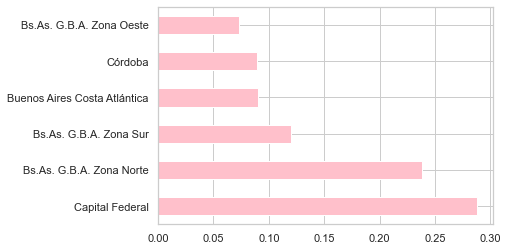

In [142]:
vc_prov.head(6).plot(kind = 'barh', color='pink')

In [133]:
df = data.property_type.value_counts() / data.shape[0] 
#el 59% de las propiedades son del tipo depto .
df

apartment    0.591370
house        0.324521
PH           0.051781
store        0.032328
Name: property_type, dtype: float64

<AxesSubplot:>

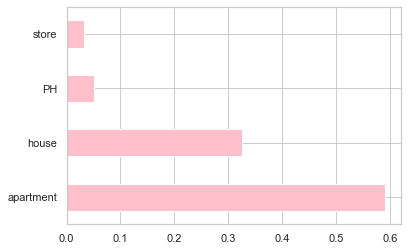

In [138]:
df.plot(kind = 'barh', color='pink')

#### Eliminamos las variables de precio que no utilizaremos 

In [25]:
data = data.drop(['price','currency', 'price_aprox_local_currency'], axis='columns')

#### Vemos un describe del precio a ver como esta distribuido para entender los outliers

In [33]:
data.price_aprox_usd.describe()


count    1.008100e+05
mean     2.397006e+05
std      3.913239e+05
min      0.000000e+00
25%      8.973388e+04
50%      1.450000e+05
75%      2.650000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

##### Eliminamos Outliers dentro de Precio, que es la variable target

In [27]:
#utilizamos rango intercuarticilo para definirlo 
RSI=data['price_aprox_usd'].describe()["75%"]-data['price_aprox_usd'].describe()["25%"]
max_value=data['price_aprox_usd'].describe()["75%"]+1.5*RSI
min_value=data['price_aprox_usd'].describe()["25%"]-1.5*RSI
print(max_value, min_value)

527899.1799999999 -173165.3


In [42]:
mask=np.logical_and(data['price_aprox_usd']>0, data['price_aprox_usd']<=max_value)
data_filtrado=data[mask]

#le puse mayor a cero porque el min value es negativo, pero aun así me queda una propiedad de 4600 usd, ver! 

In [43]:
data_filtrado.shape

(92444, 23)

In [44]:
data_filtrado.price_aprox_usd.describe()

# la mediana del precio es de 135.000 usd 

count     92444.000000
mean     168861.487869
std      109800.170307
min        4666.620000
25%       85017.242500
50%      134900.000000
75%      225000.000000
max      526957.000000
Name: price_aprox_usd, dtype: float64

### Hasta acá tenemos el precio limpio sin outliers. 

# Funcion para sacar Outliers y CORR IVAN ! Ver decision de sup cubierta !!! (TP4 Y 5)

In [55]:
data_filtrado[['price_aprox_usd', 'surface_total_in_m2']].corr()

#no sirve verlo así 
# ver porque en tp 3 nos daba una correlacion de 48% con esto mismo 

,price_aprox_usd,surface_total_in_m2
price_aprox_usd,1.000000,0.070568
surface_total_in_m2,0.070568,1.000000


In [56]:
data_filtrado["property_type"].value_counts()

apartment    56477
house        28232
PH            5166
store         2569
Name: property_type, dtype: int64

In [57]:
pd.qcut(data_filtrado['price_aprox_usd'], q=10)

#estoy agrupando en precio en 10 rangos. 
###ver que hacer, en que clase vimos cut y qcut? ver! 

0          (4666.619, 63000.0]
1         (134900.0, 160000.0]
2           (63000.0, 79500.0]
3          (94300.0, 114850.0]
4           (63000.0, 79500.0]
                  ...         
121209    (345000.0, 526957.0]
121216    (345000.0, 526957.0]
121217    (114850.0, 134900.0]
121218     (94300.0, 114850.0]
121219    (114850.0, 134900.0]
Name: price_aprox_usd, Length: 92444, dtype: category
Categories (10, interval[float64, right]): [(4666.619, 63000.0] < (63000.0, 79500.0] < (79500.0, 94300.0] < (94300.0, 114850.0] ... (160000.0, 197000.0] < (197000.0, 250000.0] < (250000.0, 345000.0] < (345000.0, 526957.0]]

### Relacion entre precio y superficie 

<AxesSubplot:title={'center':'price_aprox_usd'}, xlabel='property_type'>

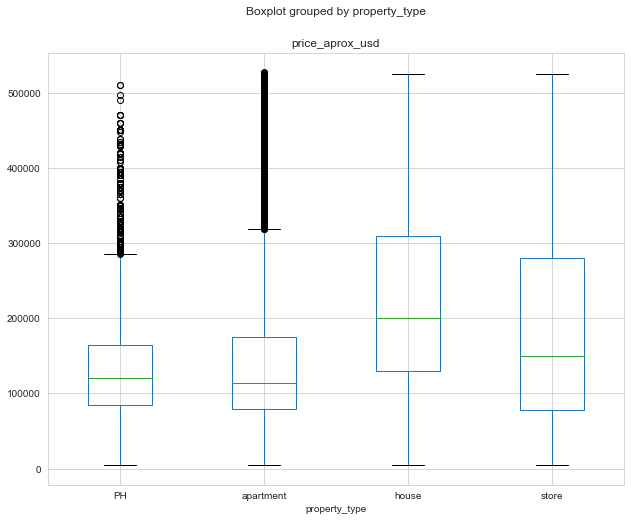

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_filtrado.boxplot(column=['price_aprox_usd'], by='property_type', ax=ax, )

<AxesSubplot:title={'center':'surface_total_in_m2'}, xlabel='property_type'>

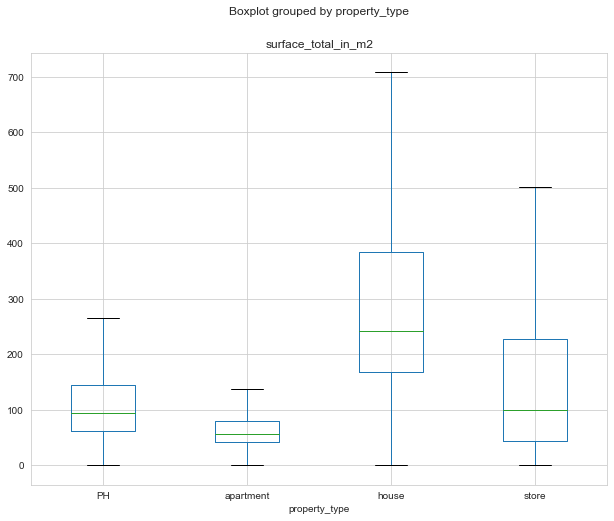

In [66]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
data_filtrado.boxplot(column=['surface_total_in_m2'], by='property_type', ax=ax, showfliers = False )

Vamos a reemplazar los valores nulos por la mediana en estos casos, para que nos quede bien el DF 


In [68]:
data_filtrado.isnull().sum()

Unnamed: 0                     0
operation                      0
property_type                  0
place_name                     8
place_with_parent_names        0
country_name                   0
state_name                     0
geonames_id                15065
lat-lon                    38326
lat                        38326
lon                        38326
price_aprox_usd                8
surface_total_in_m2        29815
surface_covered_in_m2      12534
price_usd_per_m2           30062
price_per_m2               12536
floor                      86016
rooms                      55882
expenses                   80332
properati_url                  0
description                    2
title                          0
image_thumbnail             2101
dtype: int64

In [ ]:
## tratar los valores nulos y tomar decisiones de reemplazar por la media 

#### Analisis para tipo de propiedad y habitaciones 

In [69]:
data_filtrado["property_type"].value_counts()

apartment    56477
house        28232
PH            5166
store         2569
Name: property_type, dtype: int64

In [70]:
data_filtrado.loc[:, ['property_type', 'rooms']].groupby('property_type').describe()

rooms                                              
                 count      mean       std  min  25%  50%  75%   max
property_type                                                       
PH              2804.0  3.242511  1.177305  1.0  3.0  3.0  4.0  11.0
apartment      25726.0  2.430848  1.219098  1.0  2.0  2.0  3.0  32.0
house           7964.0  4.485937  2.074992  1.0  3.0  4.0  5.0  30.0
store             68.0  2.338235  2.250110  1.0  1.0  1.0  3.0  10.0

<AxesSubplot:xlabel='property_type', ylabel='rooms'>

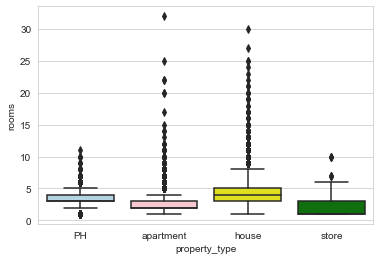

In [75]:
palette_suburb =  ["lightblue", "pink", "yellow", "green", "orange"]
sns.boxplot(x = "property_type", y = "rooms", data=data_filtrado, palette = palette_suburb)